In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
    

In [75]:
df=pd.read_csv('user_behavior_dataset.csv')
df

User ID        Device Model Operating System  App Usage Time  \
0          1      Google Pixel 5          Android             393   
1          2           OnePlus 9          Android             268   
2          3        Xiaomi Mi 11          Android             154   
3          4      Google Pixel 5          Android             239   
4          5           iPhone 12              iOS             187   
..       ...                 ...              ...             ...   
695      696           iPhone 12              iOS              92   
696      697        Xiaomi Mi 11          Android             316   
697      698      Google Pixel 5          Android              99   
698      699  Samsung Galaxy S21          Android              62   
699      700           OnePlus 9          Android             212   

     Screen On Time  Battery Drain  Number of Apps Installed  Data Usage  Age  \
0               6.4           1872                        67        1122   40   
1               4.7           1331                        42         944   47   
2               4.0            761                        32         322   42   
3               4.8           1676                        56         871   20   
4               4.3           1367                        58         988   31   
..              ...            ...                       ...         ...  ...   
695             3.9           1082                        26         381   22   
696             6.8           1965                        68        1201   59   
697             3.1            942                        22         457   50   
698             1.7            431                        13         224   44   
699             5.4           1306                        49         828   23   

     Gender User Behavior Class  
0      Male          Heavy User  
1    Female        Regular User  
2      Male     Occasional User  
3      Male        Regular User  
4    Female        Regular User  
..      ...                 ...  
695    Male     Occasional User  
696    Male          Heavy User  
697  Female     Occasional User  
698    Male         Casual User  
699  Female        Regular User  

[700 rows x 11 columns]

In [76]:
df.shape

(700, 11)

In [77]:
df.columns

Index(['User ID', 'Device Model', 'Operating System', 'App Usage Time',
       'Screen On Time', 'Battery Drain', 'Number of Apps Installed',
       'Data Usage', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [78]:
df.head(5)

User ID    Device Model Operating System  App Usage Time  Screen On Time  \
0        1  Google Pixel 5          Android             393             6.4   
1        2       OnePlus 9          Android             268             4.7   
2        3    Xiaomi Mi 11          Android             154             4.0   
3        4  Google Pixel 5          Android             239             4.8   
4        5       iPhone 12              iOS             187             4.3   

   Battery Drain  Number of Apps Installed  Data Usage  Age  Gender  \
0           1872                        67        1122   40    Male   
1           1331                        42         944   47  Female   
2            761                        32         322   42    Male   
3           1676                        56         871   20    Male   
4           1367                        58         988   31  Female   

  User Behavior Class  
0          Heavy User  
1        Regular User  
2     Occasional User  
3        Regular User  
4        Regular User

In [79]:
df.tail(5)

User ID        Device Model Operating System  App Usage Time  \
695      696           iPhone 12              iOS              92   
696      697        Xiaomi Mi 11          Android             316   
697      698      Google Pixel 5          Android              99   
698      699  Samsung Galaxy S21          Android              62   
699      700           OnePlus 9          Android             212   

     Screen On Time  Battery Drain  Number of Apps Installed  Data Usage  Age  \
695             3.9           1082                        26         381   22   
696             6.8           1965                        68        1201   59   
697             3.1            942                        22         457   50   
698             1.7            431                        13         224   44   
699             5.4           1306                        49         828   23   

     Gender User Behavior Class  
695    Male     Occasional User  
696    Male          Heavy User  
697  Female     Occasional User  
698    Male         Casual User  
699  Female        Regular User

In [80]:
df.shape

(700, 11)

In [81]:
df.isnull().sum()

User ID                     0
Device Model                0
Operating System            0
App Usage Time              0
Screen On Time              0
Battery Drain               0
Number of Apps Installed    0
Data Usage                  0
Age                         0
Gender                      0
User Behavior Class         0
dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   700 non-null    int64  
 1   Device Model              700 non-null    object 
 2   Operating System          700 non-null    object 
 3   App Usage Time            700 non-null    int64  
 4   Screen On Time            700 non-null    float64
 5   Battery Drain             700 non-null    int64  
 6   Number of Apps Installed  700 non-null    int64  
 7   Data Usage                700 non-null    int64  
 8   Age                       700 non-null    int64  
 9   Gender                    700 non-null    object 
 10  User Behavior Class       700 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 60.3+ KB


In [83]:
df.describe()

User ID  App Usage Time  Screen On Time  Battery Drain  \
count  700.00000      700.000000      700.000000     700.000000   
mean   350.50000      271.128571        5.272714    1525.158571   
std    202.21688      177.199484        3.068584     819.136414   
min      1.00000       30.000000        1.000000     302.000000   
25%    175.75000      113.250000        2.500000     722.250000   
50%    350.50000      227.500000        4.900000    1502.500000   
75%    525.25000      434.250000        7.400000    2229.500000   
max    700.00000      598.000000       12.000000    2993.000000   

       Number of Apps Installed   Data Usage         Age  
count                700.000000   700.000000  700.000000  
mean                  50.681429   929.742857   38.482857  
std                   26.943324   640.451729   12.012916  
min                   10.000000   102.000000   18.000000  
25%                   26.000000   373.000000   28.000000  
50%                   49.000000   823.500000   38.000000  
75%                   74.000000  1341.000000   49.000000  
max                   99.000000  2497.000000   59.000000

In [84]:
enc=LabelEncoder()
df['Device Model']=enc.fit_transform(df['Device Model'])
df['Operating System']=enc.fit_transform(df['Operating System'])
df['Gender']=enc.fit_transform(df['Gender'])
df['User Behavior Class']=enc.fit_transform(df['User Behavior Class'])


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   700 non-null    int64  
 1   Device Model              700 non-null    int64  
 2   Operating System          700 non-null    int64  
 3   App Usage Time            700 non-null    int64  
 4   Screen On Time            700 non-null    float64
 5   Battery Drain             700 non-null    int64  
 6   Number of Apps Installed  700 non-null    int64  
 7   Data Usage                700 non-null    int64  
 8   Age                       700 non-null    int64  
 9   Gender                    700 non-null    int64  
 10  User Behavior Class       700 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.3 KB


In [87]:
df.isnull().sum()

User ID                     0
Device Model                0
Operating System            0
App Usage Time              0
Screen On Time              0
Battery Drain               0
Number of Apps Installed    0
Data Usage                  0
Age                         0
Gender                      0
User Behavior Class         0
dtype: int64

In [88]:
df.duplicated().sum()

np.int64(0)

In [89]:
df.corr()

User ID  Device Model  Operating System  \
User ID                   1.000000     -0.006788          0.005359   
Device Model             -0.006788      1.000000          0.707477   
Operating System          0.005359      0.707477          1.000000   
App Usage Time           -0.024957      0.021657          0.031577   
Screen On Time           -0.014287      0.035581          0.026470   
Battery Drain            -0.019377      0.040976          0.040361   
Number of Apps Installed -0.023914      0.029720          0.038984   
Data Usage               -0.014527      0.036759          0.028687   
Age                       0.045188      0.015390          0.020358   
Gender                    0.019259     -0.033846         -0.027589   
User Behavior Class       0.003118      0.031346          0.050684   

                          App Usage Time  Screen On Time  Battery Drain  \
User ID                        -0.024957       -0.014287      -0.019377   
Device Model                    0.021657        0.035581       0.040976   
Operating System                0.031577        0.026470       0.040361   
App Usage Time                  1.000000        0.950333       0.956385   
Screen On Time                  0.950333        1.000000       0.948983   
Battery Drain                   0.956385        0.948983       1.000000   
Number of Apps Installed        0.955253        0.946975       0.961853   
Data Usage                      0.942308        0.941322       0.932276   
Age                             0.004382        0.017232      -0.002722   
Gender                         -0.004551        0.003573       0.006271   
User Behavior Class             0.625123        0.690348       0.659649   

                          Number of Apps Installed  Data Usage       Age  \
User ID                                  -0.023914   -0.014527  0.045188   
Device Model                              0.029720    0.036759  0.015390   
Operating System                          0.038984    0.028687  0.020358   
App Usage Time                            0.955253    0.942308  0.004382   
Screen On Time                            0.946975    0.941322  0.017232   
Battery Drain                             0.961853    0.932276 -0.002722   
Number of Apps Installed                  1.000000    0.934800  0.004034   
Data Usage                                0.934800    1.000000  0.003999   
Age                                       0.004034    0.003999  1.000000   
Gender                                    0.016245    0.023151  0.006965   
User Behavior Class                       0.665409    0.677571 -0.000760   

                            Gender  User Behavior Class  
User ID                   0.019259             0.003118  
Device Model             -0.033846             0.031346  
Operating System         -0.027589             0.050684  
App Usage Time           -0.004551             0.625123  
Screen On Time            0.003573             0.690348  
Battery Drain             0.006271             0.659649  
Number of Apps Installed  0.016245             0.665409  
Data Usage                0.023151             0.677571  
Age                       0.006965            -0.000760  
Gender                    1.000000            -0.014471  
User Behavior Class      -0.014471             1.000000

In [90]:
df['User Behavior Class'].value_counts()

User Behavior Class
2    146
3    143
1    139
4    136
0    136
Name: count, dtype: int64

In [91]:
ubc = df[df['User Behavior Class'] == 1]
ubc = df[df['User Behavior Class'] == 2]
ubc = df[df['User Behavior Class'] == 3]
ubc = df[df['User Behavior Class'] == 4]
ubc = df[df['User Behavior Class'] == 5]
print(ubc.shape)

(0, 11)


In [92]:
print(type(ubc))

<class 'pandas.core.frame.DataFrame'>


In [93]:
ubc = df[df['User Behavior Class'] == 1]
ubc = df[df['User Behavior Class'] == 2]
ubc = df[df['User Behavior Class'] == 3]
ubc = df[df['User Behavior Class'] == 4]
ubc = df[df['User Behavior Class'] == 5]
print(ubc.shape)

(0, 11)


In [94]:
print(df.columns)

Index(['User ID', 'Device Model', 'Operating System', 'App Usage Time',
       'Screen On Time', 'Battery Drain', 'Number of Apps Installed',
       'Data Usage', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')


In [95]:
x=df.loc[:,['App Usage Time','Screen On Time','Number of Apps Installed','Data Usage','Age','Operating System']]
x

App Usage Time  Screen On Time  Number of Apps Installed  Data Usage  \
0               393             6.4                        67        1122   
1               268             4.7                        42         944   
2               154             4.0                        32         322   
3               239             4.8                        56         871   
4               187             4.3                        58         988   
..              ...             ...                       ...         ...   
695              92             3.9                        26         381   
696             316             6.8                        68        1201   
697              99             3.1                        22         457   
698              62             1.7                        13         224   
699             212             5.4                        49         828   

     Age  Operating System  
0     40                 0  
1     47                 0  
2     42                 0  
3     20                 0  
4     31                 1  
..   ...               ...  
695   22                 1  
696   59                 0  
697   50                 0  
698   44                 0  
699   23                 0  

[700 rows x 6 columns]

In [96]:
y=df.loc[:,["User Behavior Class"]]
y

User Behavior Class
0                      1
1                      3
2                      2
3                      3
4                      3
..                   ...
695                    2
696                    1
697                    2
698                    0
699                    3

[700 rows x 1 columns]

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.9,random_state=6)

In [98]:
x_train.shape,x_test.shape

((70, 6), (630, 6))

In [99]:
y_train.shape,y_test.shape

((70, 1), (630, 1))

In [100]:
scaler=StandardScaler()

In [101]:
scaler.fit(x_train)

StandardScaler()

In [102]:
x_train_std = scaler.transform(x_train)

In [103]:
x_train_std

array([[ 0.47760508,  0.17734277,  0.15470783,  0.31616729, -1.50819323,
         1.91485422],
       [-0.68426895, -0.62459482, -0.44073124, -0.46551309, -1.50819323,
        -0.52223297],
       [-0.43366867, -0.30381978,  0.00584806, -0.50244287, -1.33968002,
        -0.52223297],
       [ 0.68833714,  0.17734277,  0.67571702,  0.40079805,  0.42970869,
         1.91485422],
       [-0.66718257, -0.20758727,  0.043063  , -0.38549856, -0.49711397,
        -0.52223297],
       [ 0.84781004,  0.36980779,  0.26635266,  0.07612371,  0.6824785 ,
        -0.52223297],
       [ 0.78515997,  0.59435032,  0.78736184,  0.67161645, -1.17116681,
        -0.52223297],
       [ 1.3205333 ,  1.84537296,  1.56887562,  2.05802202,  1.10376153,
        -0.52223297],
       [ 1.35470607,  1.71706294,  1.1967262 ,  1.3578949 , -0.24434415,
         1.91485422],
       [-1.51580625, -1.42653241, -1.44553467, -1.26873585,  1.27227474,
        -0.52223297],
       [ 1.21231954,  1.3321329 ,  1.53166068,  0.

In [104]:
x_train_std.std()

np.float64(0.9999999999999999)

In [105]:
x_test_std = scaler.transform(x_test)
x_test_std

array([[ 0.93893742,  0.4018853 ,  0.26635266,  0.25923388, -1.25542341,
        -0.52223297],
       [ 1.37179245,  1.17174538,  1.49444574,  1.05630168, -0.74988378,
        -0.52223297],
       [ 0.08461828,  0.17734277,  0.7501469 ,  0.13151838,  1.01950492,
        -0.52223297],
       ...,
       [-0.87791462, -0.94536986, -1.07338525, -0.73479275, -0.66562718,
        -0.52223297],
       [-0.74122356, -1.13783488, -1.03617031, -1.13794287, -0.58137057,
        -0.52223297],
       [-0.74122356, -0.72082733, -1.25945996, -0.70401793, -0.41285736,
         1.91485422]])

In [106]:
x_test_std.std()

np.float64(1.0057924278015615)

In [107]:
model1=LogisticRegression()


In [108]:
model1.fit(x_train,y_train)

C:\Users\brahu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brahu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
y_predict1=model1.predict(x_test)

In [110]:
accuracy_score(y_test,y_predict1)*100

66.34920634920634

In [111]:
classification_report(y_test,y_predict1)

'              precision    recall  f1-score   support\n\n           0       0.95      0.76      0.84       125\n           1       0.56      0.53      0.54       120\n           2       0.68      0.49      0.57       136\n           3       0.51      0.78      0.62       129\n           4       0.77      0.77      0.77       120\n\n    accuracy                           0.66       630\n   macro avg       0.69      0.67      0.67       630\nweighted avg       0.69      0.66      0.67       630\n'

In [112]:
model2=SVC()
model2.fit(x_train,y_train)


C:\Users\brahu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [113]:
y_predict2=model2.predict(x_test)

In [114]:
accuracy_score(y_test,y_predict2)*100

91.58730158730158

In [115]:
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)


DecisionTreeClassifier()

In [116]:
y_predict3=model3.predict(x_test)

In [117]:
accuracy_score(y_test,y_predict3)*100

98.4126984126984

In [118]:
model4=RandomForestClassifier()
model4.fit(x_train,y_train)

C:\Users\brahu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [119]:
y_predict4=model4.predict(x_test)

In [120]:
accuracy_score(y_test,y_predict4)*100

100.0

In [121]:
model5=KNeighborsClassifier()
model5.fit(x_train,y_train)


C:\Users\brahu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [122]:
y_predict5=model5.predict(x_test)

In [123]:
accuracy_score(y_test,y_predict5)*100

98.25396825396825

In [124]:
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv("user_behavior_dataset.csv")



profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
                        
profile.to_file("pandas_profiling_report.html")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [125]:
profile.to_notebook_iframe()

In [126]:
numerical_columns = [
    'App Usage Time', 'Screen On Time', 'Battery Drain', 
    'Number of Apps Installed', 'Data Usage', 'Age']
corr_matrix = df[numerical_columns].corr()


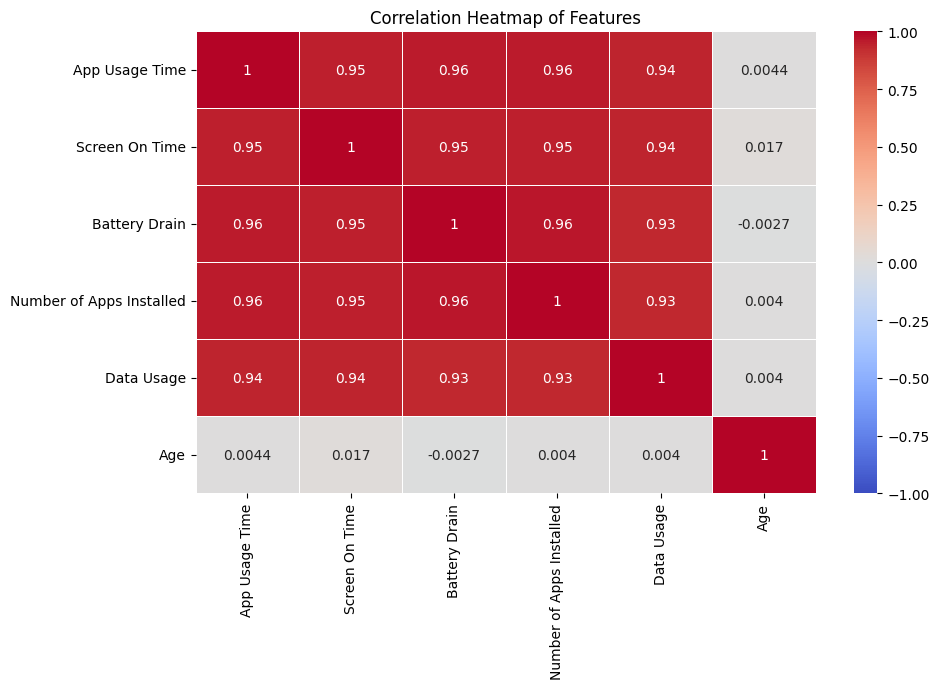

In [127]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.show()

array([[<Axes: title={'center': 'User ID'}>,
        <Axes: title={'center': 'App Usage Time'}>,
        <Axes: title={'center': 'Screen On Time'}>],
       [<Axes: title={'center': 'Battery Drain'}>,
        <Axes: title={'center': 'Number of Apps Installed'}>,
        <Axes: title={'center': 'Data Usage'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >, <Axes: >]],
      dtype=object)

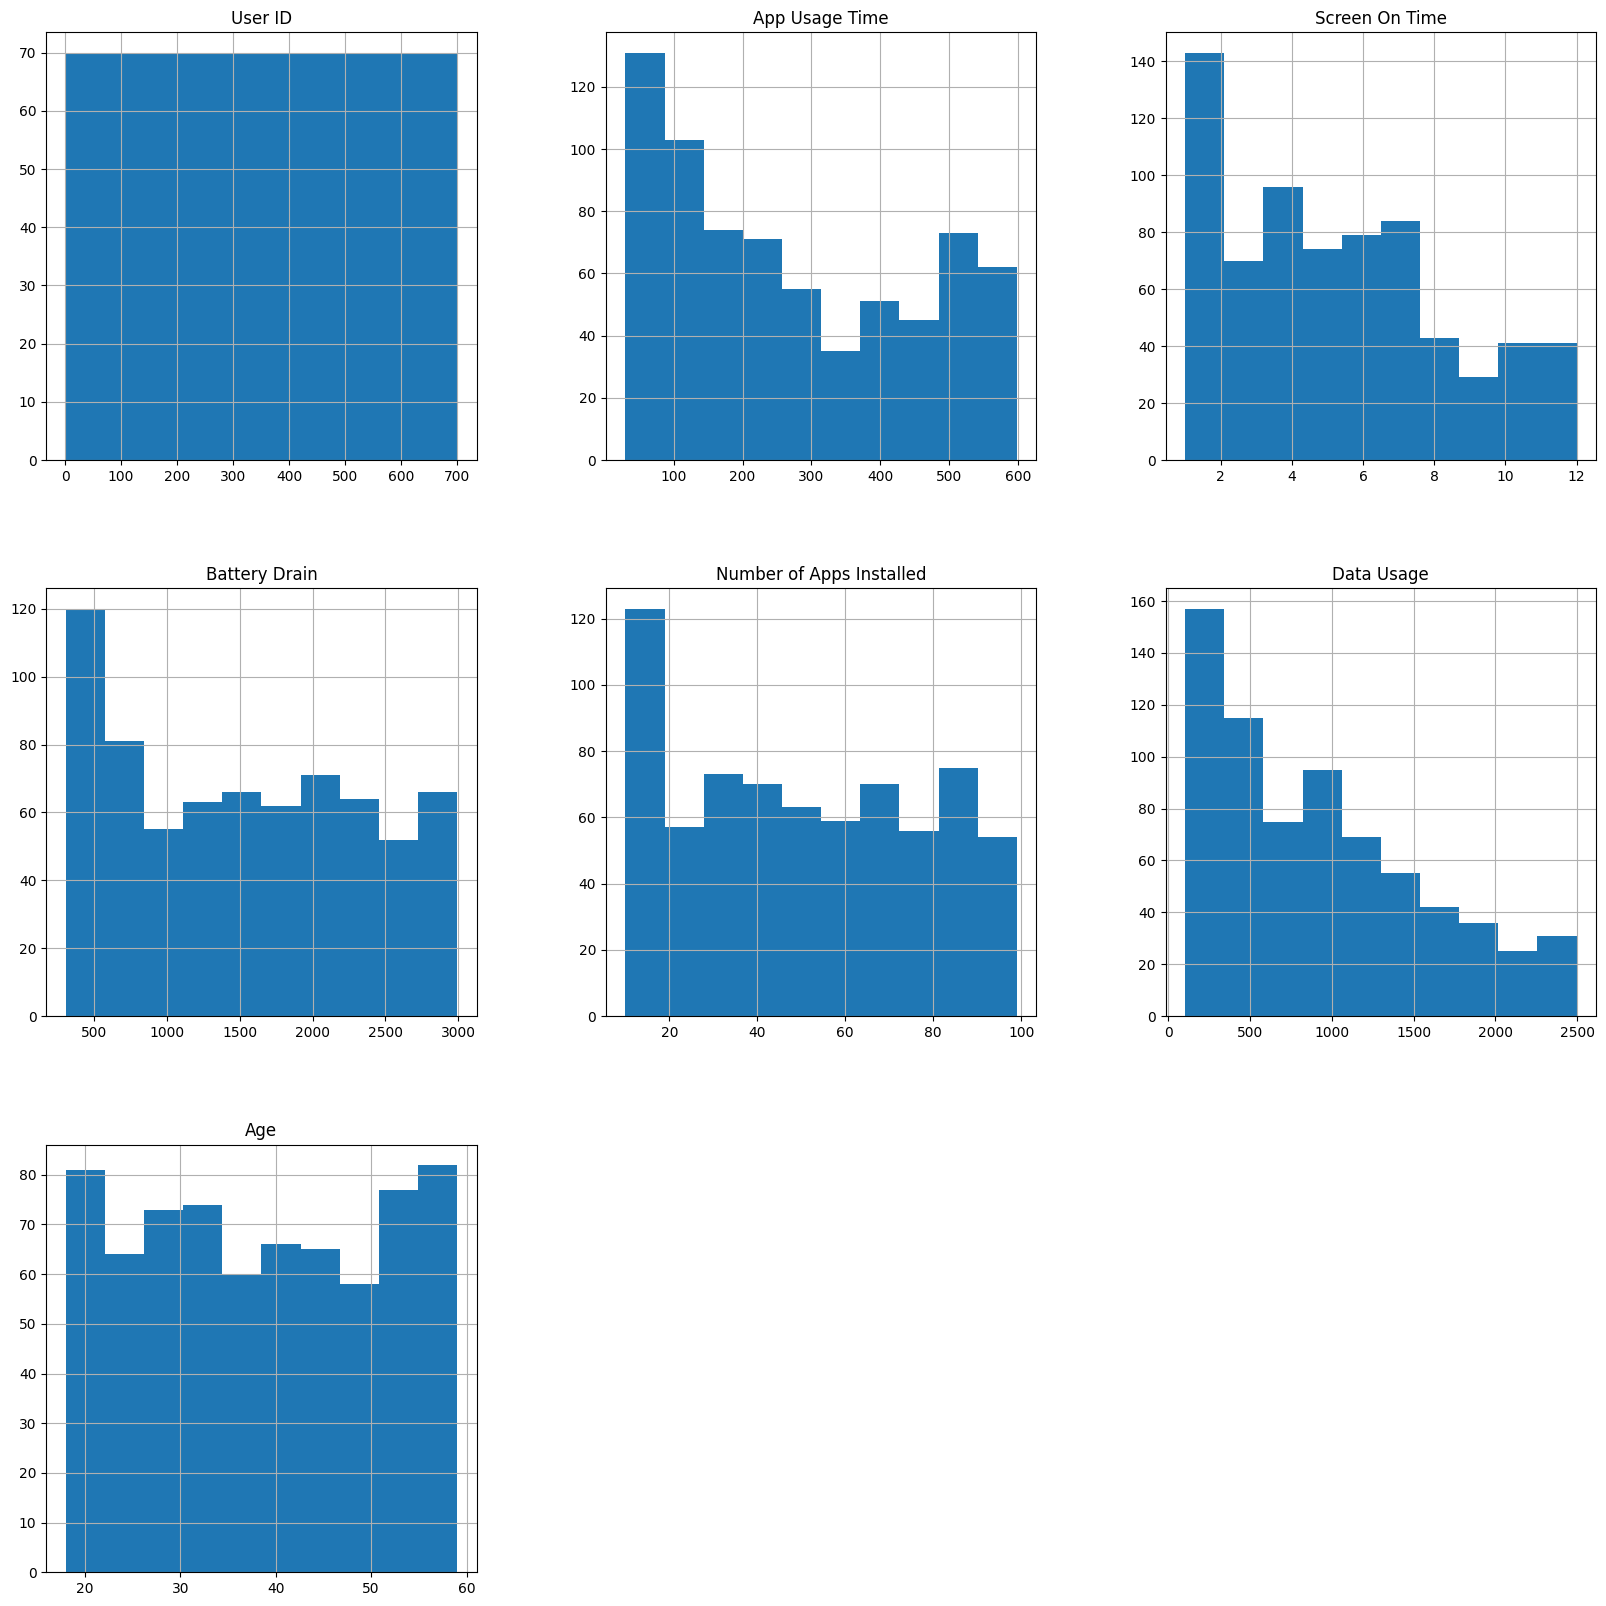

In [133]:
df.hist(figsize = (20,20))

In [128]:
models=[ LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(random_state=42)]

In [129]:
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()  # Add KNN to the list of classifiers
]
# Iterate over each classifier
for classifier in classifiers:
    # Train the classifier
    classifier.fit(x_train_std, y_train)
    
    # Make predictions
    y_pred = classifier.predict(x_test_std)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)*100
    
    # Print the accuracy
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")

C:\Users\brahu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brahu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classifier: LogisticRegression
Accuracy: 84.1270
Classifier: RandomForestClassifier
Accuracy: 100.0000
Classifier: SVC
Accuracy: 97.3016
Classifier: DecisionTreeClassifier
Accuracy: 98.4127
Classifier: KNeighborsClassifier
Accuracy: 85.8730


C:\Users\brahu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\brahu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [130]:
import pickle
from tkinter import*
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from PIL import ImageTk,Image

In [131]:
filename="Rahul Minor project"
pickle.dump(model4,open(filename,'wb'))
model04=pickle.load(open(filename,'rb'))
with open('model04.pkl','wb') as files:
    pickle.dump(model04,files)
with open('model04.pkl', 'rb') as model_file:
    Result = pickle.load(model_file)   

In [139]:
# Import required libraries
import tkinter as tk
from tkinter import ttk, messagebox
import numpy as np
import pickle
from PIL import Image, ImageTk  # Make sure to import Image and ImageTk

# Load model (replace with your actual model file)
def load_model():
    return pickle.load(open('model04.pkl', 'rb'))

# Load your model
Result = load_model()

# Validation function
def validate_input(entry, min_val, max_val, data_type):
    try:
        value = data_type(entry.get())
        if not (min_val <= value <= max_val):
            raise ValueError(f'The input field should be between {min_val} and {max_val}')
        return value
    except ValueError as ve:
        messagebox.showerror('Error', str(ve))
        return None

# Prediction function
def predict():
    try:
        # Get the selected gender value
        Gender = gender_var.get()
        if Gender not in [0, 1]:  # Ensure a valid selection
            messagebox.showerror('Error', 'Please select a gender')
            return

        # Validate other input values
        Age = validate_input(entry2, 20, 60, int)  # Age: 20 to 60
        App_Usage_Time = validate_input(entry3, 0, 500, int)  # App Usage Time: 0 to 500 minutes
        Screen_On_Time = validate_input(entry4, 0, 24, float)  # Screen On Time: 0 to 24 hours
        Num_Apps_Installed = validate_input(entry5, 0, 100, int)  # Number of Apps Installed: 0 to 100
        
        Operating_System = dropdown_os.get()
        if Operating_System == 'Android':
            Operating_System = 0
        elif Operating_System == 'iOS':
            Operating_System = 1
        else:
            messagebox.showerror('Error', 'Please select a valid Operating System')
            return

        # Check if any input validation failed
        if any(value is None for value in [Age, App_Usage_Time, Screen_On_Time, Num_Apps_Installed]):
            return  # Exit if any input is invalid

        # Prepare input for prediction
        inp = np.array([App_Usage_Time, Screen_On_Time, Num_Apps_Installed, Age, Gender, Operating_System])
        
        # Make the prediction
        prediction = int(Result.predict(inp.reshape(1, -1)))
        
        # Display the prediction result
        if prediction == 0:
            text = 'The user is an Occasional User'
        elif prediction == 1:
            text = 'The user is a Regular User'
        else:
            text = 'The user is a Heavy User'
        
        t.delete('1.0', 'end')
        t.insert('1.0', text)
    except Exception as ep:
        messagebox.showerror('Error', f'Prediction error: {str(ep)}')

# Reset function to clear inputs and output
def reset():
    for entry in [entry2, entry3, entry4, entry5]:
        entry.delete('0', 'end')
    gender_var.set(-1)  # Reset gender selection
    dropdown_os.set("Select your OS")
    t.delete('1.0', 'end')

# Create the main application window
root = tk.Tk()
root.title('Mobile Device Usage and User Behavior Prediction')

# Load and resize the image to fit the window
image_path = r"IMAGE.jpg"  # Change this to your image path

try:
    image1 = Image.open(image_path)  # Load the image
    window_width = root.winfo_screenwidth()
    window_height = root.winfo_screenheight()
    image1 = image1.resize((window_width, window_height), Image.LANCZOS)
    background = ImageTk.PhotoImage(image1)
    label = tk.Label(root, image=background)
    label.image = background  # Store a reference to avoid garbage collection
    label.place(x=0, y=0, relwidth=1, relheight=1)
except FileNotFoundError:
    messagebox.showerror('Error', f'Image file not found: {image_path}')
    root.destroy()
except Exception as e:
    messagebox.showerror('Error', f'Failed to load image: {e}')
    root.destroy()

# Title Label
label1 = tk.Label(root, text="Mobile Device Usage and User Behavior", font=("Times new roman", 35, "bold"), fg="black", highlightbackground='grey')
label1.place(x=300, y=50)

# Feature 1: Gender (Radio Buttons)
label2 = tk.Label(root, text="Gender:", font=("Times new roman", 18, "bold"), fg="black", highlightbackground='grey', bg="light yellow")
label2.place(x=100, y=200)

gender_var = tk.IntVar(value=-1)  # Variable to store the selected gender (0: Female, 1: Male)

radio1 = tk.Radiobutton(root, text="Female", variable=gender_var, value=0, font=("Times new roman", 18))
radio1.place(x=500, y=200)

radio2 = tk.Radiobutton(root, text="Male", variable=gender_var, value=1, font=("Times new roman", 18))
radio2.place(x=650, y=200)

# Feature 2: Age
label3 = tk.Label(root, text="Age [20-60]:", fg="black", font=("Times new roman", 18, "bold"), highlightbackground='grey', bg="light yellow")
label3.place(x=100, y=250)
entry2 = tk.Entry(root, width=20, font=("Times new roman", 18, "bold"), fg="black")
entry2.place(x=500, y=250)

# Feature 3: App Usage Time
label4 = tk.Label(root, text="App Usage Time [0-500 minutes]:", fg="black", font=("Times new roman", 18, "bold"), highlightbackground='grey', bg="light yellow")
label4.place(x=100, y=300)
entry3 = tk.Entry(root, width=20, font=("Times new roman", 18, "bold"), fg="black")
entry3.place(x=500, y=300)

# Feature 4: Screen On Time
label5 = tk.Label(root, text="Screen On Time [0-24 hours]:", fg="black", font=("Times new roman", 18, "bold"), highlightbackground='grey', bg="light yellow")
label5.place(x=100, y=350)
entry4 = tk.Entry(root, width=20, font=("Times new roman", 18, "bold"), fg="black")
entry4.place(x=500, y=350)

# Feature 5: Number of Apps Installed
label6 = tk.Label(root, text="Number of Apps Installed [0-100]:", fg="black", font=("Times new roman", 18, "bold"), highlightbackground='grey', bg="light yellow")
label6.place(x=100, y=400)
entry5 = tk.Entry(root, width=20, font=("Times new roman", 18, "bold"), fg="black")
entry5.place(x=500, y=400)

# Feature 6: Operating System (Dropdown)
label7 = tk.Label(root, text="Operating System:", fg="black", font=("Times new roman", 18, "bold"), highlightbackground='grey', bg="light yellow")
label7.place(x=100, y=450)

options = ['Android', 'iOS']
dropdown_os = ttk.Combobox(root, values=options, width=18, font=("Times new roman", 18, "bold"))
dropdown_os.place(x=500, y=450)
dropdown_os.set("Select your OS")

# Button to trigger prediction
button1 = tk.Button(root, text='PREDICT', highlightbackground='grey', fg="coral", command=predict, font=("Times new roman", 18, "bold"), bg="black")
button1.place(x=500, y=500)

# Text area to display the result
t = tk.Text(root, highlightbackground='green', fg="dark blue", bg="lemon chiffon", height=3, width=50, font=("Times new roman", 18, "bold"))
t.place(x=250, y=600)

# Clear button
button2 = tk.Button(root, text='CLEAR', fg="coral", command=reset, font=("Times new roman", 18, "bold"))
button2.place(x=650, y=500)

# Start the main event loop
root.mainloop()
